# Introduction

Tax Increment Financing (TIF) is a special funding tool used by the City of Chicago to promote public and private investment across the city. The program freezes existing Equalized Assessed Valuations for a designated area for 23 to 24 years. All tax revenues above that rate (due to increased property valuations) are collected as a part of the TIF, diverging from existing taxing districts (i.e., the City, Chicago Board of Education (CPS), Community Colleges of Chicago, the Metropolitan Water Reclamation District of Greater Chicago, Cook County, and the Forest Preserve District of Cook County).

Source: https://www.chicago.gov/city/en/depts/dcd/provdrs/tif.html

Data Source: https://data.cityofchicago.org/Community-Economic-Development/TIF-Funding-Sources-and-Uses-by-TIF-Fiscal-Year-an/pner-h2in

## Project Objective

Since its start in 1984, TIF funds divert money from the existing tax base and are purported to support reinvestment in blighted communities. In this analysis we are going to examine three types of transacations: revenue, expenditures, and transfers (in and out).

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as tick
import matplotlib.dates as mdate
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import squarify
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['figure.figsize'] = 8, 5

In [2]:
TIF_Data = pd.read_csv(r'C:\Users\maryi\Desktop\Data Skills\TIF_Funding_Sources_and_Uses_by_TIF__Fiscal_Year__and_Type_-_1998-2014.csv')

## Exploratory Data Analysis

Within this dataset, there are 6 columns with 9815 records. Each record contains information about a TIF transaction, with 6 possible 'Types' of transactions. In turn, each 'Type' corresponds with 14 possible 'Activities'. The dataset contains information about 173 TIF districts, over the span of 1998-2014. The Near South TIF District has the greatest number of records within the data set. 

There are no null values within this dataset and we made sure to strip whitespace from column names.

In [3]:
TIF_Data.columns=TIF_Data.columns.str.strip()

In [4]:
TIF_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Fiscal Year   9815 non-null   int64 
 1   TIF Number    9815 non-null   object
 2   TIF District  9815 non-null   object
 3   Type          9815 non-null   object
 4   Activity      9815 non-null   object
 5   Amount        9815 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 460.2+ KB


In [5]:
TIF_Data['TIF District'].describe()

count           9815
unique           173
top       Near South
freq             135
Name: TIF District, dtype: object

The number of TIF districts has grown over time, from 0 in 1998 to 149 districts in 2014 (Fig titled'TIF Districts from 1998-2014'), with the largest jump occurring in 2001. 

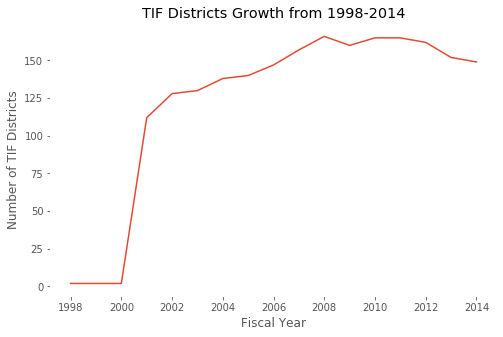

In [6]:
ax=TIF_Data.groupby(['Fiscal Year'])['TIF District'].nunique().plot()
ax.ticklabel_format(useOffset=False)
ax.set_ylabel('Number of TIF Districts')
plt.title('TIF Districts Growth from 1998-2014')
plt.show()
plt.close()

# TIF Fund Year-over-Year (YoY) Analysis

From the chart depicted below, over the span of 16 years, the change in TIF Fund Balance YoY has varied greatly, with large swings in both directions, indicating a lack of "smoothness" in the way TIF Funds are spent. Since TIF funded-projects are subject to investor (both public and private) interest as well as approval, this could explain the discrete jumps in the TIF fund. Of note are the significant expenditures that take place in 2014, which leads to the greatest YoY percentage change in TIF funds over the 16 year span we are examining.

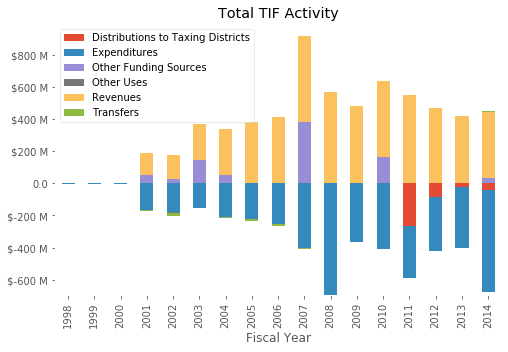

In [7]:
Total_TIF=TIF_Data.pivot_table('Amount',
                               index='Fiscal Year', 
                               columns='Type',
                               aggfunc='sum')
ax=Total_TIF.plot.bar(stacked=True)
plt.title('Total TIF Activity')
def y_format(tick_val, pos):
    if tick_val > 1000000:
        val = (int(tick_val)/1000000)
        return '${:.0f} M'.format(val)
    elif tick_val < -1000000:
        val = int(tick_val)/1000000.0
        return '${:.0f} M'.format(val)
    else:
        return tick_val
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_format))
plt.legend(loc='best')
plt.show()
plt.close()

In [8]:
year_over_year_total= TIF_Data.groupby('Fiscal Year').sum().reset_index()
year_over_year_total['YoY Percent Change'] =((year_over_year_total['Amount'].diff()/year_over_year_total['Amount'].shift().abs())*100).round(2)

In [9]:
print('\nTotal TIF Fund Balance from 1998-2014')
year_over_year_total


Total TIF Fund Balance from 1998-2014


,Fiscal Year,Amount,YoY Percent Change
0,1998,-2434311,NaN
1,1999,-3061700,-25.77
2,2000,-3396887,-10.95
3,2001,17047103,601.84
4,2002,-26905356,-257.83
5,2003,214496132,897.22
6,2004,123501593,-42.42
7,2005,146923142,18.96
8,2006,147170957,0.17
9,2007,504411156,242.74


In [10]:
print('\n Summary Statistics for YoY Percent Change from 1998-2014:')
year_over_year_total['YoY Percent Change'].describe()


 Summary Statistics for YoY Percent Change from 1998-2014:


count      16.000000
mean        8.753750
std       487.917861
min     -1467.920000
25%       -77.002500
50%        -5.390000
75%       195.397500
max       897.220000
Name: YoY Percent Change, dtype: float64

## TIF Revenue Analysis

On average, tax revenue comprises the majority of TIF revenue, with land sales and rental revenue close behind.

In [11]:
TIF_Data_Revenue = TIF_Data[TIF_Data.Type.eq('Revenues')]

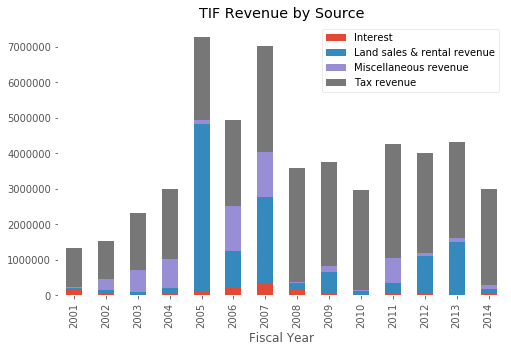

In [12]:
ax=TIF_Data_Revenue.pivot_table('Amount',index='Fiscal Year', columns='Activity',
                    aggfunc='mean').plot.bar(stacked=True)
plt.title('TIF Revenue by Source')
plt.legend(loc='best')
plt.show()
plt.close()

In [13]:
TIF_Data_Revenue_by_district=TIF_Data_Revenue.pivot_table('Amount',
                                                          index='TIF District', 
                                                          columns='Activity',
                                                          aggfunc='mean').round().reset_index()
TIF_Data_Revenue_by_district.columns=TIF_Data_Revenue_by_district.columns.str.strip()
TIF_Data_Revenue_by_district=TIF_Data_Revenue_by_district[['TIF District','Tax revenue']]

In [14]:
TIF_Data_Revenue_by_district.sort_values(['Tax revenue'],ascending=False).head(10)

Activity,TIF District,Tax revenue
59,Central Loop,79875292.0
124,Near South,40964239.0
58,Canal/Congress,13875078.0
105,LaSalle Central,13720487.0
103,Kinzie Industrial Corridor,13716760.0
123,Near North,12753220.0
64,Chicago/Kingsbury,10036121.0
60,Central West,9872266.0
125,Near West,9598941.0
120,Midwest,9579594.0


In [15]:
TIF_Data_Revenue_by_district.sort_values(['Tax revenue'],ascending=True).head(10)

Activity,TIF District,Tax revenue
57,Calumet River,0.0
122,Montrose/Clarendon,0.0
62,Chicago Lakeside Development Ph.1,0.0
12,40th/State,0.0
53,Bloomingdale/Laramie,10.0
104,Kostner Avenue,400.0
5,134th and Avenue K,3746.0
164,West Pullman Industrial Park Conservation Area,11803.0
30,73rd and Kedzie,16565.0
166,West Woodlawn,20498.0


## TIF Expenditure Analysis

Over the span of 16 years, the majority of TIF Fund spending has been primarily dedicated to Public Improvement, Financing, and Site Assembly & Prep. We see two spikes in spending, one in 2008 and the other in 2014. These spikes could be related to mayoral and aldermanic elections (occurring in 2014, 2011, and 2008) and transitions (potentially higher social program and reinvestment expenditures during the election cycle), though the data here is inconclusive.

In [16]:
TIF_Data_Expenditure = TIF_Data[TIF_Data.Type.eq('Expenditures')]

In [17]:
TIF_Data_Expenditure['Amount']=TIF_Data_Expenditure['Amount']*-1

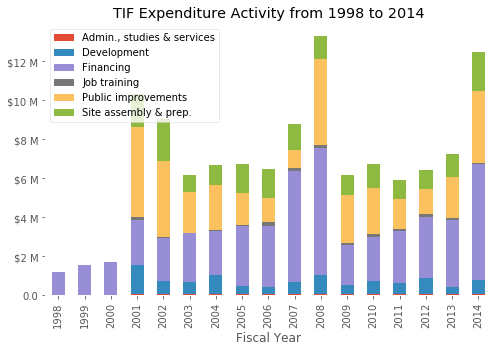

In [18]:
ax=TIF_Data_Expenditure.pivot_table('Amount',
                                    index='Fiscal Year', 
                                    columns='Activity',
                                    aggfunc='mean').plot.bar(stacked=True)
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_format))
plt.title('TIF Expenditure Activity from 1998 to 2014')
plt.legend(loc='best')

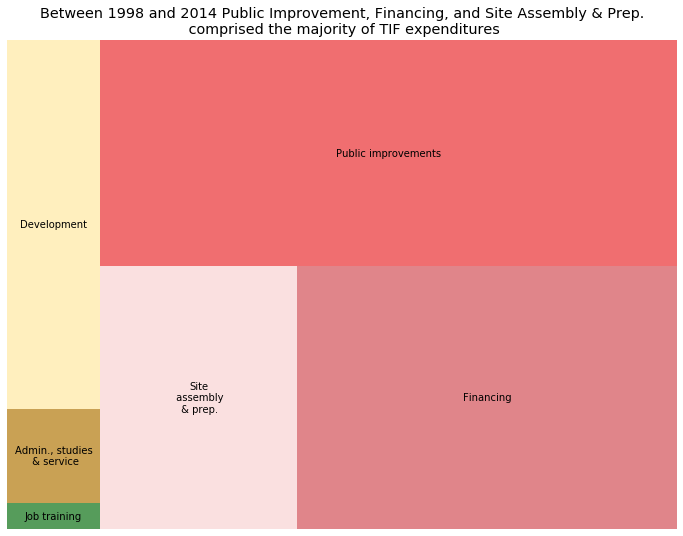

In [19]:
expense_total_activity=TIF_Data_Expenditure.groupby('Activity')['Amount'].sum().sort_values(ascending=True)
plt.figure(figsize=(12, 9))
labels =['Job training',
         'Admin., studies\n & service',
         'Development',
         'Site\n assembly\n & prep.',
         'Financing',
         'Public improvements']
color_list = ['#0f7216', '#b2790c', '#ffe9a3', '#f9d4d4', '#d35158', '#ea3033']
squarify.plot(sizes=expense_total_activity, label=labels,
             color=color_list,alpha=0.7)
plt.title('Between 1998 and 2014 Public Improvement, Financing, and Site Assembly & Prep.\n comprised the majority of TIF expenditures')
plt.axis('off')
plt.show()

## TIF Transfer

Money can be transferred between TIF districts, but only between adjacent TIFs. Here we pull out the 10 districts that received the greatest amount of funding from other districts and the 10 districts that sent the most to other districts.

In [20]:
TIF_Data_Transfer=TIF_Data.pivot_table('Amount',
                                               index='TIF District', 
                                               columns='Activity',
                                               aggfunc='mean',
                                               fill_value=0).round().reset_index()
TIF_Data_Transfer.columns=TIF_Data_Transfer.columns.str.strip()
TIF_Data_Transfer=TIF_Data_Transfer[['TIF District','Transfers in','Transfers out']]

In [21]:
print('Top 10 TIF Districts Receiving Transfers')
TIF_Data_Transfer.sort_values(by=['Transfers in'],ascending=False).head(10)

Top 10 TIF Districts Receiving Transfers


Activity,TIF District,Transfers in,Transfers out
56,Calumet Avenue/Cermak Road,28000000.0,-3462000.0
6,24th/Michigan,10471275.0,-4115000.0
88,Goose Island,10000000.0,-229659.0
140,Randolph/Wells,9877333.0,0.0
105,LaSalle Central,8600000.0,-7770500.0
60,Central West,7846253.0,-2120000.0
81,Englewood Mall,7500000.0,0.0
143,River South,7057500.0,-5050306.0
128,North Pullman,6850000.0,0.0
63,Chicago/Central Park,6488227.0,0.0


In [22]:
print('Top 10 TIF Districts Providing Transfers')
TIF_Data_Transfer.sort_values(by=['Transfers out'],ascending=True).head(10)

Top 10 TIF Districts Providing Transfers


Activity,TIF District,Transfers in,Transfers out
124,Near South,0.0,-15383603.0
105,LaSalle Central,8600000.0,-7770500.0
142,Read-Dunning,1811000.0,-7712540.0
82,Englewood Neighborhood,0.0,-7500000.0
59,Central Loop,2900000.0,-7350755.0
125,Near West,2120000.0,-7203764.0
58,Canal/Congress,545866.0,-5785519.0
143,River South,7057500.0,-5050306.0
144,River West,0.0,-4342112.0
6,24th/Michigan,10471275.0,-4115000.0


# Next Steps

The next step in fleshing out this analysis is to dive into geospatial trends. Given Chicago's history of segregation (https://www.theatlantic.com/business/archive/2018/03/chicago-segregation-poverty/556649/), the analysis should flesh out what trends look like across the city. We want to dive in to see which TIF districts see expenditures, transfers out, and transfers in. The last piece of analysis would be to see if there is a correlation between which districts tend to have projects passed with their location in Chicago and district demographics.